# Risk Management Project

### 1. Import Data from yfinance

In [3]:
import functions as f
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [4]:
tickers = ['JNJ', 'XOM', 'TLT', 'GLD', 'AAPL']
start_date = "2018-01-01"
end_date = "2023-01-01"

# Download adjusted close prices from Yahoo Finance for a 5-year range
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [5]:
missing_data = data.isnull().sum()
print("Missing values per ticker:\n", missing_data)

Missing values per ticker:
 Ticker
AAPL    0
GLD     0
JNJ     0
TLT     0
XOM     0
dtype: int64


In [6]:
portfolio_weights = np.array([0.25,  0.20, 0.25,  0.15, 0.15])
risk_free_ratio = 0.05

In [7]:
data

Ticker,AAPL,GLD,JNJ,TLT,XOM
Date,,,,,
2018-01-02 00:00:00+00:00,40.524349,125.150002,115.682442,106.164909,61.637554
2018-01-03 00:00:00+00:00,40.517288,124.820000,116.787476,106.672493,62.848099
2018-01-04 00:00:00+00:00,40.705494,125.459999,116.779205,106.655571,62.935093
2018-01-05 00:00:00+00:00,41.168930,125.330002,117.743004,106.351021,62.884361
2018-01-08 00:00:00+00:00,41.016026,125.309998,117.892548,106.283318,63.167088
...,...,...,...,...,...
2022-12-23 00:00:00+00:00,130.487823,167.259995,168.306671,95.841934,102.460419
2022-12-27 00:00:00+00:00,128.676834,168.669998,168.259247,93.946854,103.884010
2022-12-28 00:00:00+00:00,124.728371,167.910004,167.529053,93.393364,102.177589


### 2. Calculate Portfolio Returns and Covariance Matrix

In [9]:
daily_returns = data.pct_change().dropna()
daily_returns

Ticker,AAPL,GLD,JNJ,TLT,XOM
Date,,,,,
2018-01-03 00:00:00+00:00,-0.000174,-0.002637,0.009552,0.004781,0.019640
2018-01-04 00:00:00+00:00,0.004645,0.005127,-0.000071,-0.000159,0.001384
2018-01-05 00:00:00+00:00,0.011385,-0.001036,0.008253,-0.002855,-0.000806
2018-01-08 00:00:00+00:00,-0.003714,-0.000160,0.001270,-0.000637,0.004496
2018-01-09 00:00:00+00:00,-0.000115,-0.004628,0.015857,-0.013372,-0.004246
...,...,...,...,...,...
2022-12-23 00:00:00+00:00,-0.002798,0.002998,0.002542,-0.014660,0.026445
2022-12-27 00:00:00+00:00,-0.013879,0.008430,-0.000282,-0.019773,0.013894
2022-12-28 00:00:00+00:00,-0.030685,-0.004506,-0.004340,-0.005892,-0.016426


In [10]:
portfolio_rets = f.portfolio_return(portfolio_weights, daily_returns.T)
portfolio_rets

Date
2018-01-03 00:00:00+00:00    0.005480
2018-01-04 00:00:00+00:00    0.002353
2018-01-05 00:00:00+00:00    0.004153
2018-01-08 00:00:00+00:00   -0.000064
2018-01-09 00:00:00+00:00    0.000367
                               ...   
2022-12-23 00:00:00+00:00    0.002303
2022-12-27 00:00:00+00:00   -0.002736
2022-12-28 00:00:00+00:00   -0.013005
2022-12-29 00:00:00+00:00    0.012312
2022-12-30 00:00:00+00:00    0.000114
Length: 1258, dtype: float64

In [11]:
correlation_matrix = daily_returns.corr()
covariance_matrix = daily_returns.cov()

In [12]:
covariance_matrix

Ticker,AAPL,GLD,JNJ,TLT,XOM
Ticker,,,,,
AAPL,0.000445,0.000016,0.000116,-0.000037,0.000156
GLD,0.000016,0.000082,0.000005,0.000026,0.000013
JNJ,0.000116,0.000005,0.000173,-0.000029,0.000095
TLT,-0.000037,0.000026,-0.000029,0.000103,-0.000066
XOM,0.000156,0.000013,0.000095,-0.000066,0.000455


In [13]:
portfolio_volatility = f.portfolio_vol(portfolio_weights, covariance_matrix)

In [14]:
portfolio_volatility

0.009181512198200414

### 3. VaR Calculation

#### a. Historical VaR

In [17]:
var_historic = f.var_historic(portfolio_rets, level=5)
var_historic

0.013887376539191747

#### b. Gaussian VaR

In [19]:
var_gaussian = f.var_gaussian(portfolio_rets, level=5, modified=False)
var_gaussian

0.014570330392861442

#### c. Cornish-Fisher VaR

In [21]:
skewness = f.skewness(portfolio_rets)
kurtosis = f.kurtosis(portfolio_rets)

In [22]:
skewness

-0.16098747813854838

In [23]:
kurtosis

10.213933774987918

In [24]:
var_cornish_fisher = f.var_gaussian(portfolio_rets, level=5, modified=True)
var_cornish_fisher

0.013649721943878531

### 4. CVaR Calculation

#### a. Historical CVaR  

In [27]:
cvar_historic = f.cvar_historic(portfolio_rets, level=5)
cvar_historic

0.021733805708231604

#### b. Gaussian CVaR

In [29]:
cvar_gaussian = f.cvar_gaussian(portfolio_rets, level=5, modified=False)
cvar_gaussian

-0.0015222934645987554

### 5. Maximum Drawdown (MDD)

In [31]:
drawdowns = f.drawdown(portfolio_rets, start=100)
max_drawdown = drawdowns.min()

In [32]:
max_drawdown

Wealth       91.403771
Peaks       100.548027
Drawdown     -0.210893
dtype: float64

In [33]:
wealth_index = f.compound_returns(portfolio_rets, start=100)

In [34]:
running_max = wealth_index.cummax()

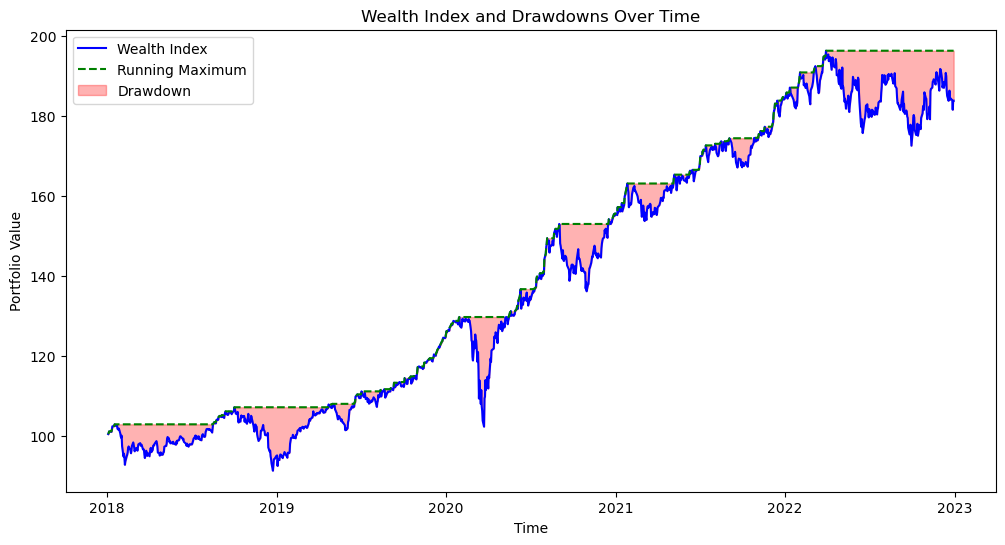

In [35]:
plt.figure(figsize=(12, 6))

plt.plot(wealth_index, label="Wealth Index", color="blue")
plt.plot(running_max, label="Running Maximum", linestyle="--", color="green")
plt.fill_between(drawdowns.index, wealth_index, running_max, color="red", alpha=0.3, label="Drawdown")


plt.title("Wealth Index and Drawdowns Over Time")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

### 6. Stress Testing

#### a. Stress test 1: COVID-19 Market Crash

In [38]:
stress_1_daily_rets = daily_returns.loc["2020-02-19":"2020-06-30"]
stress_1_cov = stress_1_daily_rets.cov()
stress_1_portfolio_rets = portfolio_rets.loc["2020-02-19":"2020-06-30"]
stress_1_portfolio_vol = f.portfolio_vol(portfolio_weights, stress_1_cov)

In [69]:
stress_1_var = f.var_historic(stress_1_daily_rets, level=5)
stress_1_var = f.var_gaussian(stress_1_daily_rets, level=5, modified=False)

stress_1_skewness = f.skewness(stress_1_portfolio_rets)
stress_1_kurtosis = f.kurtosis(stress_1_portfolio_rets)
stress_1_var = f.var_gaussian(stress_1_daily_rets, level=5, modified=True)

stress_1_cvar_historic = f.cvar_historic(stress_1_portfolio_rets, level=5)
stress_1_cvar_gaussian = f.cvar_gaussian(stress_1_portfolio_rets, level=5, modified=False)
stress_1_cvar_cornish_fisher = f.cvar_gaussian(stress_1_portfolio_rets, level=5, modified=True)

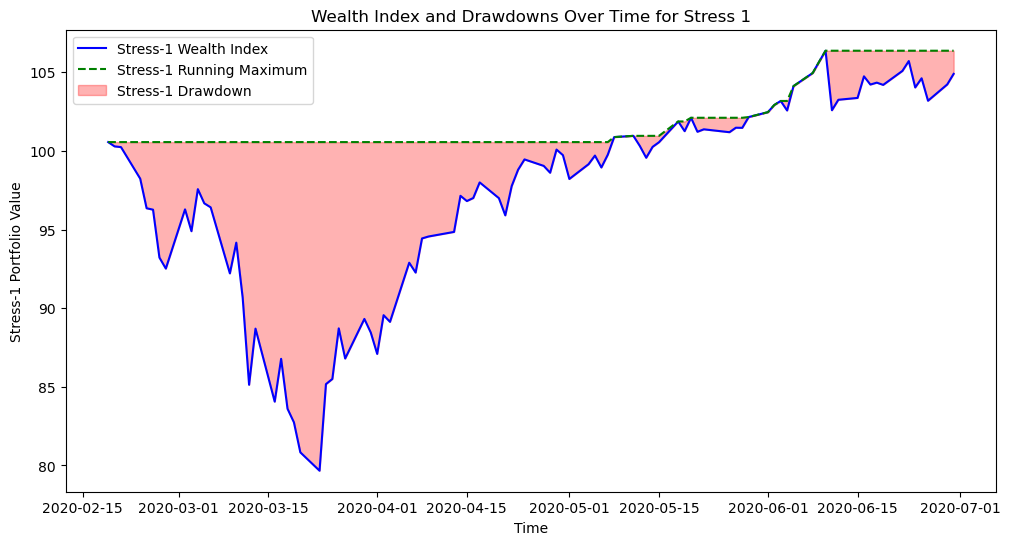

In [75]:
stress_1_drawdowns = f.drawdown(stress_1_portfolio_rets, start=100)
stress_1_max_drawdown = stress_1_drawdowns.min()

stress_1_wealth_index = f.compound_returns(stress_1_portfolio_rets, start=100)
stress_1_running_max = stress_1_wealth_index.cummax()

plt.figure(figsize=(12, 6))

plt.plot(stress_1_wealth_index, label="Stress-1 Wealth Index", color="blue")
plt.plot(stress_1_running_max, label="Stress-1 Running Maximum", linestyle="--", color="green")
plt.fill_between(stress_1_drawdowns.index, stress_1_wealth_index, stress_1_running_max, color="red", alpha=0.3, label="Stress-1 Drawdown")


plt.title("Wealth Index and Drawdowns Over Time for Stress 1")
plt.xlabel("Time")
plt.ylabel("Stress-1 Portfolio Value")
plt.legend()
plt.show()

#### b. Stress test 2: Hypothetical Scenario

In [213]:
from fbm import FBM

# Parameters
stress_days = 73
assets = ['AAPL', 'JNJ', 'XOM', 'TLT', 'GLD']

# Define FBM parameters for each asset
fbm_params = {
    'AAPL': {'hurst': 0.3, 'scale': 0.05},  # High volatility, chaotic
    'JNJ': {'hurst': 0.4, 'scale': 0.04},
    'XOM': {'hurst': 0.3, 'scale': 0.05},
    'TLT': {'hurst': 0.5, 'scale': 0.02},   # More stable
    'GLD': {'hurst': 0.5, 'scale': 0.015}  # More stable
}

# Simulate returns for each asset using FBM
np.random.seed(42)
stress_returns_fbm = pd.DataFrame()

for asset, p in fbm_params.items():
    hurst, scale = p['hurst'], p['scale']
    fbm = FBM(n=stress_days - 1, hurst=hurst, length=1, method='daviesharte')
    fbm_path = fbm.fbm()  # Generate FBM path
    returns = scale * (fbm_path[1:] - fbm_path[:-1])  # Calculate daily returns
    stress_returns_fbm[asset] = returns

# Add extreme shock days for equities
shock_days = np.random.choice(stress_days - 1, size=5, replace=False)

for day in shock_days:
    stress_returns_fbm.loc[day, ['AAPL', 'JNJ', 'XOM']] += [-0.10, -0.08, -0.12]
    stress_returns_fbm.loc[day, ['TLT', 'GLD']] += [-0.02, -0.01]  # Smaller shocks for defensive assets

# Replace FBM increments with fat-tailed noise for more chaotic behavior
for asset, p in fbm_params.items():
    scale = p['scale']
    stress_returns_fbm[asset] += np.random.standard_t(df=3, size=stress_days - 1) * scale

# Slight upward trend or stability for TLT and GLD
stress_returns_fbm['TLT'] += 0.001  # Small positive drift
stress_returns_fbm['GLD'] += 0.002

# Parameters for normalization period
normal_days = 21
normal_params = {
    'AAPL': {'hurst': 0.6, 'scale': 0.02},  # Mild upward trend
    'JNJ': {'hurst': 0.7, 'scale': 0.015},
    'XOM': {'hurst': 0.6, 'scale': 0.02},
    'TLT': {'hurst': 0.7, 'scale': 0.01},   # Stable
    'GLD': {'hurst': 0.7, 'scale': 0.008}  # Stable
}

# Simulate returns for normalization period
normal_returns_fbm = pd.DataFrame()

for asset, p in normal_params.items():
    hurst, scale = p['hurst'], p['scale']
    fbm = FBM(n=normal_days, hurst=hurst, length=1, method='daviesharte')
    fbm_path = fbm.fbm()  # Generate FBM path
    returns = scale * (fbm_path[1:] - fbm_path[:-1])  # Calculate daily returns
    normal_returns_fbm[asset] = returns

# Add a small positive drift for recovery
normal_returns_fbm += {
    'AAPL': 0.001, 'JNJ': 0.0008, 'XOM': 0.001, 'TLT': 0.0005, 'GLD': 0.0006
}

# Combine stress and normalization returns
stress_2_daily_rets = pd.concat([stress_returns_fbm, normal_returns_fbm], ignore_index=True)



In [215]:
stress_2_cov = stress_2_daily_rets.cov()

In [217]:
stress_2_portfolio_rets = f.portfolio_return(portfolio_weights, stress_2_daily_rets.T)
stress_2_portfolio_vol = f.portfolio_vol(portfolio_weights, stress_2_cov)

In [219]:
stress_2_var = f.var_historic(stress_2_daily_rets, level=5)
stress_2_var = f.var_gaussian(stress_2_daily_rets, level=5, modified=False)

stress_2_skewness = f.skewness(stress_2_portfolio_rets)
stress_2_kurtosis = f.kurtosis(stress_2_portfolio_rets)
stress_2_var = f.var_gaussian(stress_2_daily_rets, level=5, modified=True)

stress_2_cvar_historic = f.cvar_historic(stress_2_portfolio_rets, level=5)
stress_2_cvar_gaussian = f.cvar_gaussian(stress_2_portfolio_rets, level=5, modified=False)
stress_2_cvar_cornish_fisher = f.cvar_gaussian(stress_2_portfolio_rets, level=5, modified=True)

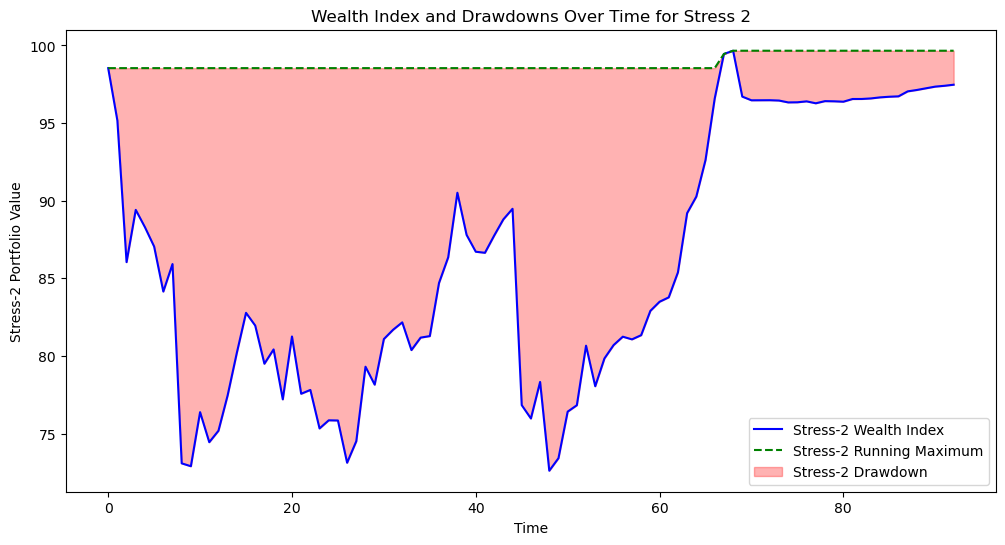

In [221]:
stress_2_drawdowns = f.drawdown(stress_2_portfolio_rets, start=100)
stress_2_max_drawdown = stress_2_drawdowns.min()

stress_2_wealth_index = f.compound_returns(stress_2_portfolio_rets, start=100)
stress_2_running_max = stress_2_wealth_index.cummax()

plt.figure(figsize=(12, 6))

plt.plot(stress_2_wealth_index, label="Stress-2 Wealth Index", color="blue")
plt.plot(stress_2_running_max, label="Stress-2 Running Maximum", linestyle="--", color="green")
plt.fill_between(stress_2_drawdowns.index, stress_2_wealth_index, stress_2_running_max, color="red", alpha=0.3, label="Stress-2 Drawdown")


plt.title("Wealth Index and Drawdowns Over Time for Stress 2")
plt.xlabel("Time")
plt.ylabel("Stress-2 Portfolio Value")
plt.legend()
plt.show()

### 7. Monte Carlo Simulations